# Experiment 4: Air Track II---Newton’s Second Law
### Objectives
- To learn to take good measurements
- To learn how to estimate and propagate errors
- To learn how to take measurements to verify a theory

### Equipment
- One Airtrack, Blower, and Cart
- One accessory kit containing: one pulley, one mass hanger, and masses for cart and hanger.
- Two (2) photogates
- One 30 cm ruler
- One vernier caliper
- One two-meter stick
- One scale

### Safety
- Be careful placing the carts on the track. Do not damage the track.
- Please place paper underneath the carts when they are resting on the track without the air turned on. **Do not slide the carts on the track without the air turned on.**

# Introduction
In 1686, Isaac Newton published his three laws of motion using information he gained from experiments performed by both Galileo Galilei and Johannes Kepler:
1. If there is no net force, there is no acceleration
2. If there is a net force, then *F = ma*
3. If object A places a force on object B, then object B places an equal but opposite force on object A.

Today you will be verifying Newton’s second law by using a known force to accelerate an airtrack glider, measuring that acceleration, and comparing it to the predicted acceleration.

# Theory
### Kinematics
First and foremost, you will need to compute the acceleration of the aitrack glider. The information you will have, however, is velocity computed by a photogate. The photogate measures the velocity of the glider as it passes through by timing how long the infrared LED is blocked by the object (sometimes called a “flag”) passing through and uses the definition of velocity:  

\begin{equation}
v \equiv \frac{\Delta x}{\Delta t}
\tag{1}
\end{equation}

where $\Delta x$ is the length of the flag and $\Delta t$ is the time the LED was blocked.

To determine the acceleration of the glider, consider the definition of acceleration:  
\begin{equation}
a_{x} \equiv \frac{\Delta v_{x}}{\Delta t}
\tag{2}
\end{equation}

To use this, you will need to know the velocity of the cart at two different times. Think carefully about how you might measure those times.

Keep in mind that you will need to determine the errors in your measurements and propagate those errors into your computed acceleration.

### Force
A proper prediction of the acceleration of the glider from Newton’s second law requires great care. Recall that the force of gravity on an object is given by $F = mg$ where $g \equiv 9.81 \pm 0.005 m/s^2$ so that $ \delta g = 0.005 m/s^2$. You should find that the acceleration of the system is some fraction of g involving the masses of both the glider and the hanging mass.

### Uncertainty Analysis
You will need to compute the uncertainty in both your predicted and your measured accelerations. The uncertainty in your predicted acceleration will depend on the uncertainty in “g” as well as the uncertainties in the masses. The uncertainty in your “measured” acceleration will depend on the uncertainties in your measured velocities and times.

The Capstone software can measure time to within $ \delta t = 0.1 ms$.

Your Lab Manual and the previous labs can guide you in estimating the uncertainties in your measurements and propagating those uncertainties into your computed accelerations. The uncertainty in the masses of the glider and hanging mass will be determined by the accuracy of the scale. For your velocities, it might be easier to use the standard deviation of a large number of measurements as your measurement uncertainty. The uncertainty in your acceleration, however, will have to be computed using the three equations in your Lab Manual.

In order to minimize random errors, it is extremely important that each of your measurements be performed several times.

# Experimental Procedure

### Setting up the Air Track
Ensure that the pulley is securely inserted into the top hole in the bracket at the far end of the track and that it spins freely. Make sure that the blower is functioning properly (you should be able to feel the air streaming out of the pin-holes). Make sure that the hanging mass will not strike the table as it falls.

You will need to level the airtrack so that the only force comes from the hanging mass. Look back to the second lab for instructions if you’ve forgotten how to do this.

### Setting up a Photogate
1. Turn on the PASCO 850 Interface and start the PASCO Capstone software.
2. Plug a photogate into a Digital input.
3. Click the “Hardware Setup” tab in the left “Tools” palette, left-click the jack on the diagram where you inserted the plug, and select “Photogate” from the drop-down menu.
4. You should see a tab labeled “Timer Setup.” Open that tab and set up a pre-configured timer:
    1. Select the photogate you just installed.
    2. You will be using this photogate with a single flag.
    3. The computer need only keep track of the speed through the gate.
    4. A text box requesting the length of the flag in meters will appear. Measure the flag as best you can and enter that information in the box.
    5. Give this sensor a name such as “Photogate 1” or similar.

Repeat steps 2—4e for the second photogate.

When you adjust the height of the photogate, make sure that it is triggered only by the flag. The string should not trigger the photogate. You can tell when the photogate is triggered by looking for the red LED to light when the infrared LED is blocked. Ensure that the red LED only lights when the proper portion of the cart passes through.

Something to think about when choosing the positions for your photogates: Where should the mass hanger be while the cart goes through a photogate?

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys; sys.path.insert(0, '..')
import P201_Functions as p201

# Flag length measurement (m) and its uncertainty
flag_len = 0.1
delta_x = 0.005

# uncertainty in measured times
delta_t = 0.001

# Acceleration Due to Gravity
g = 9.81
dg = 0.005

In [14]:
# Just some functions to make your life easier ;)
def massCalc(mass2, dmass2, mass1, dmass1):
    """
    Calculate the the theoretical force of tension and predicted acceleraton for a given cart mass and hanging mass
    :param mass2: cart mass (kg)
    :param dmass2: cart mass uncertainty (kg)
    :param mass1: hanging mass (kg)
    :param dmass1: hanging mass uncertainty (kg)
    :return: tuple containing theoretical force of tension, uncertainty in FT, predicted acceleration, uncertainty in ap
    """
    
    # Theoretical Force of Tension (N)
    theo_FT = mass1*mass2/(mass1+mass2)*g

    # calculate uncertainty in T
    dTdmass1 = mass2*g*(mass2/(mass1+mass2)**2)
    dTdmass2 = mass1*g*(mass1/(mass1+mass2)**2)
    dTdg = mass1*mass2/(mass1+mass2)
    dtheo_FT = dTdmass1*dmass1 + dTdmass2*dmass2 + dTdg*dg
    #print (theo_FT,dtheo_FT)

    # Predicted Acceleration (m/s^2) and its uncertainty
    a_p = mass1/(mass1+mass2)*g

    # calculate uncertainty in a
    dadmass1 = g*(mass2/(mass1+mass2)**2)
    dadmass2 = g*(mass1/(mass1+mass2)**2)
    dadg = mass1/(mass1+mass2)
    da_p = dadmass1*dmass1 + dadmass2*dmass2 + dadg*dg
    #print (a_p,da_p)
    
    return theo_FT, dtheo_FT, a_p, da_p

def runCalc(df):
    """
    calculates the uncertanties and acceleration for a cart track run
    :param df: a pandas dataframe containing v1,t1,v2,t2 data
    :return: tuple containing pandas daraframe containing [v1,t1,v2,t2,a,𝛿v,𝛿am], average measured acceleration, and average acceleration uncertainty
    """
    # Calculates the change in velocity and time 
    Delta_v = df['v2 (m/s)'] - df['v1 (m/s)']
    Delta_t = df['t2 (s)'] - df['t1 (s)']

    # Calculates acceleration
    df['a (m/s^2)'] = Delta_v/Delta_t

    # Calculates the uncertainty of the velocity based on Equation 1
    uncertainty_v = Delta_v*(delta_x/flag_len + delta_t/Delta_t)
    df["𝛿v (m/s^2)"] =  uncertainty_v

    # Finds the uncertainty of acceleration and adds it to the dataframe
    unc_am = df['a (m/s^2)']*((uncertainty_v/Delta_v) + (delta_t/Delta_t))
    df["𝛿am (m/s^2)"] = unc_am

    # Finds the average measured acceleration
    av_am = sum(df['a (m/s^2)'])/len(df['a (m/s^2)'])
    dav_am = sum(df["𝛿am (m/s^2)"])/len(df["𝛿am (m/s^2)"])/np.sqrt(len(df["𝛿am (m/s^2)"]))
    
    return df, av_am, dav_am

def printData(n,m2,dm2,m1,dm1,a_p,da_p,theo_FT,dtheo_FT,av_am,dav_am, df):
    """
    prints out nicely formatted run data
    params:
        n: int number of the run
        m2: float mass of the cart
        dm2: float uncertainty in mass of cart
        m1: float mass of hanging mass
        dm1: float uncertainty in hanging mass mass
        a_p: float predicted acceleration
        da_p: float  Predicted acceleration uncertainty
        theo_FT: float theoretical tension force
        dtheo_FT: float theoretical tension force uncertainty
        av_am: float average measured acceleration
        dav_am: i'm sure you get the picture by now
        df: the pandas dataframe
    returns:
        nothing
    """
    # prints out the cart data
    print("Data for Run {}:".format(n))
    print("m_cart = %0.5f kg              𝛿m_cart = %0.6f" % (m2, dm2))
    print("m_hang = %0.5f kg              𝛿m_hang = %0.6f" % (m1, dm1))
    print("Predicted a_p = %0.3f m/s^2      𝛿a_p = %0.4f" % (a_p, da_p))
    print("Theoretical F_T = %0.5f N        𝛿F_T = %0.4f"      % (theo_FT,dtheo_FT))
    print('-'*70)

    # Prints information about the file
    #df.info()
    print(df)
    print()
    # Print statements for uncertainty + average
    print("Average am = %0.5f  +/- %0.5f m/s^2" % (av_am,dav_am))
    print('-'*70)
    print()


### Data Collection
<u>**To release the cart: Hold the cart in position and turn on the blower. The cart must be released when the blower is running at full speed.**</u>

Capstone will display the photogate data any way you like. The best tool for displaying the data from a photogate, however, might be a table that plots the time that the photogate was triggered in one column and the velocity through that photogate in the other. You will need one table for each photogate.

Your goal is to confirm or deny Newton’s Second Law: $F = ma$. Notice that, if you had data points for the force (tension), *F*, as a function of the acceleration, *a*, you could create a graph. If that graph had the right shape, you might say that you had confirmed Newton’s Second Law. How should you plot this graph so that the slope has meaning?

You will need to plot a few different points of tension versus acceleration for each cart mass---*at least five* points, but the more data you have, the better your graph will be. Therefore, pick a cart mass and measure its acceleration for each of five different hanging masses. Once you’ve done that, change the cart mass and repeat the experiment. Please make sure that your cart does not bounce back through the second photogate after striking the bumper at the end of the track.

Your final result should be a graph of the force on the cart vs. the acceleration of the cart taken at a number of different masses for the hanging mass and the cart mass.

**Remember: Time is short---taking data is your first priority.** However, if the data you are taking is poor, then you might as well not be taking any data at all. Always dedicate one team member to compute the results of your experiments (in this case, they should be computing your measured accelerations) to see if your data matches your theoretical prediction. If your data is *not* matching your predictions, you should stop *and* diagnose the problem (check both your experiment and your prediction) before continuing.

You <u>must</u> take data with at least <u>two different cart masses</u>. If there is time, you can create a third graph with a third cart mass if you like. But you might make a preliminary plot of the data you have and try and fill in any gaps in that data, first.

Linear Fit: Coefficients (from curve_fit)
[-1.45175561e-05  1.83306933e-01]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 9.65595311e-07 -2.17797493e-06]
 [-2.17797493e-06  8.64626716e-06]]

Linear Fit: Final Result: y = (0.18331 +/- 0.00294) x + (-0.00001 +/- 0.00098)



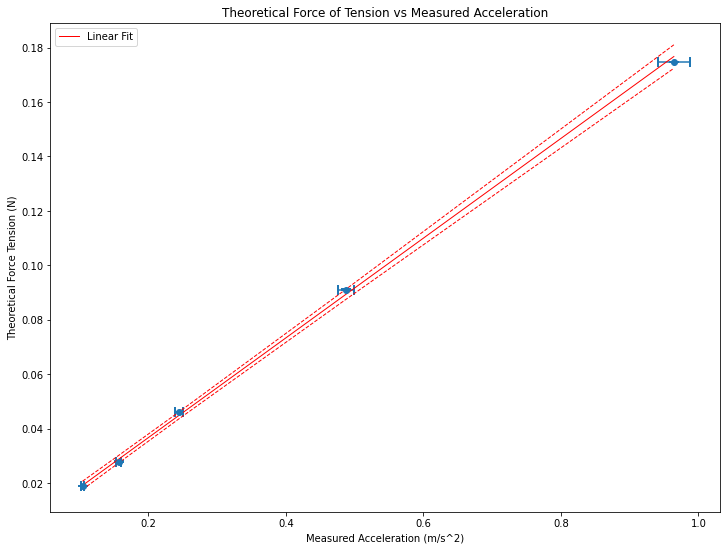

In [22]:
# Raw Data 
# Cart Mass 1

doPrintData = False # change this to False if you wish to hide the tables of calculated data

xaxis = np.array([])
yaxis = np.array([])
dxaxis = np.array([])
dyaxis = np.array([])

# Mass of the cart (kg) and its uncertainty
m2  = 0.20013
dm2 = 0.000005

#2#2# HANGING MASS #1 DATA #1#1#1#1#1#1#1#1#1#1#1#1#1

# Mass of hanging mass (kg) and its uncertainty
m1  = 0.00194
dm1 = 0.000005

theo_FT, dtheo_FT, a_p, da_p = massCalc(m2,dm2,m1,dm1)
yaxis = np.append(yaxis, theo_FT)
dyaxis = np.append(dyaxis, dtheo_FT)
df1 = pd.DataFrame()

# RUN 1 DATA HERE:[Trial1,Trial2,Trial3,Trial4,Trial5]
df1['v1 (m/s)'] = [0.14  ,0.11  ,0.12  ,0.14  ,0.17]
df1['t1 (s)']   = [24.241 ,2.761 ,1.979 ,2.564 ,2.192]
df1['v2 (m/s)'] = [0.36  ,0.31  ,0.32  ,0.32  ,0.34]
df1['t2 (s)']   = [26.104 ,4.709 ,3.878 ,4.426 ,3.893]

df1, av_am, dav_am = runCalc(df1)
xaxis = np.append(xaxis, av_am)
dxaxis = np.append(dxaxis, dav_am)

if doPrintData:
    printData(1,m2,dm2,m1,dm1,a_p,da_p,theo_FT,dtheo_FT,av_am,dav_am, df1)

#2#2# HANGING MASS #2 DATA #2#2#2#2#2#2#2#2#2#2#2#2#2
m1  = 0.00288
dm1 = 0.000005

theo_FT, dtheo_FT, a_p, da_p = massCalc(m2,dm2,m1,dm1)
yaxis = np.append(yaxis, theo_FT)
dyaxis = np.append(dyaxis, dtheo_FT)
df2 = pd.DataFrame()

# RUN 2 DATA HERE:[Trial1,Trial2,Trial3,Trial4,Trial5]
df2['v1 (m/s)'] = [0.14,0.13,0.16,0.15,0.13]
df2['t1 (s)']   = [2.302,1.580,0.969,2.244,1.939]
df2['v2 (m/s)'] = [0.438,0.38,0.43,0.38,0.38]
df2['t2 (s)']   = [3.904,3.199,2.828,3.813,3.562]

df2, av_am, dav_am = runCalc(df2)
xaxis = np.append(xaxis, av_am)
dxaxis = np.append(dxaxis, dav_am)

if doPrintData:
    printData(2,m2,dm2,m1,dm1,a_p,da_p,theo_FT,dtheo_FT,av_am,dav_am, df2)

#3#3# HANGING MASS #3 DATA #3#3#3#3#3#3#3#3#3#3#3#3#3
m1  = 0.00481
dm1 = 0.000005

theo_FT, dtheo_FT, a_p, da_p = massCalc(m2,dm2,m1,dm1)
yaxis = np.append(yaxis, theo_FT)
dyaxis = np.append(dyaxis, dtheo_FT)
df3 = pd.DataFrame()

# RUN 3 DATA HERE:[Trial1,Trial2,Trial3,Trial4,Trial5]
df3['v1 (m/s)'] = [0.17,0.17,0.15,0.16,0.17]
df3['t1 (s)']   = [1.896,2.535,2.734,1.946,2.076]
df3['v2 (m/s)'] = [0.48,0.48,0.47,0.48,0.48]
df3['t2 (s)']   = [3.175,3.811,4.034,3.228,3.354]

df3, av_am, dav_am = runCalc(df3)
xaxis = np.append(xaxis, av_am)
dxaxis = np.append(dxaxis, dav_am)

if doPrintData:
    printData(3,m2,dm2,m1,dm1,a_p,da_p,theo_FT,dtheo_FT,av_am,dav_am, df3)

#4#4# HANGING MASS #4 DATA #4#4#4#4#4#4#4#4#4#4#4#4#4
m1  = 0.00973
dm1 = 0.000005

theo_FT, dtheo_FT, a_p, da_p = massCalc(m2,dm2,m1,dm1)
yaxis = np.append(yaxis, theo_FT)
dyaxis = np.append(dyaxis, dtheo_FT)
df4 = pd.DataFrame()

# RUN 4 DATA HERE:[Trial1,Trial2,Trial3,Trial4,Trial5]
df4['v1 (m/s)'] = [0.24,0.23,0.29,0.29,0.27]
df4['t1 (s)']   = [7.352,5.565,2.260,1.177,1.454]
df4['v2 (m/s)'] = [0.68,0.68,0.70,0.70,0.69]
df4['t2 (s)']   = [8.242,6.472,3.110,2.030,2.325]

df4, av_am, dav_am = runCalc(df4)
xaxis = np.append(xaxis, av_am)
dxaxis = np.append(dxaxis, dav_am)

if doPrintData:
    printData(4,m2,dm2,m1,dm1,a_p,da_p,theo_FT,dtheo_FT,av_am,dav_am, df4)

#5#5# HANGING MASS #5 DATA #5#5#5#5#5#5#5#5#5#5#5#5#5
m1  = 0.01955
dm1 = 0.000005

theo_FT, dtheo_FT, a_p, da_p = massCalc(m2,dm2,m1,dm1)
yaxis = np.append(yaxis, theo_FT)
dyaxis = np.append(dyaxis, dtheo_FT)
df5 = pd.DataFrame()

# RUN 5 DATA HERE:[Trial1,Trial2,Trial3,Trial4,Trial5]
df5['v1 (m/s)'] = [0.33,0.37,0.34,0.33,0.32]
df5['t1 (s)']   = [3.50,0.882,1.126,0.827,1.044]
df5['v2 (m/s)'] = [0.95,0.96,0.96,0.95,0.95]
df5['t2 (s)']   = [4.142,1.509,1.764,1.468,1.690]

df5, av_am, dav_am = runCalc(df5)
xaxis = np.append(xaxis, av_am)
dxaxis = np.append(dxaxis, dav_am)

if doPrintData:
    printData(5,m2,dm2,m1,dm1,a_p,da_p,theo_FT,dtheo_FT,av_am,dav_am, df5)

#####################################################

plt.rcParams["figure.figsize"] = (12,9)
plt.errorbar(xaxis, yaxis, xerr=dxaxis, yerr=dyaxis, fmt='o', capsize=5, capthick=2)
plt.title("Theoretical Force of Tension vs Measured Acceleration")
plt.xlabel("Measured Acceleration (m/s^2)")
plt.ylabel("Theoretical Force Tension (N)")

b, m, db, dm = p201.linear_fit_plot_errors(xaxis,yaxis,dyaxis,plt)
plt.legend()
plt.show()

***

Linear Fit: Coefficients (from curve_fit)
[0.00361163 0.26730427]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 8.43679325e-08 -2.76111618e-07]
 [-2.76111618e-07  1.73642401e-06]]

Linear Fit: Final Result: y = (0.26730 +/- 0.00132) x + (0.00361 +/- 0.00029)



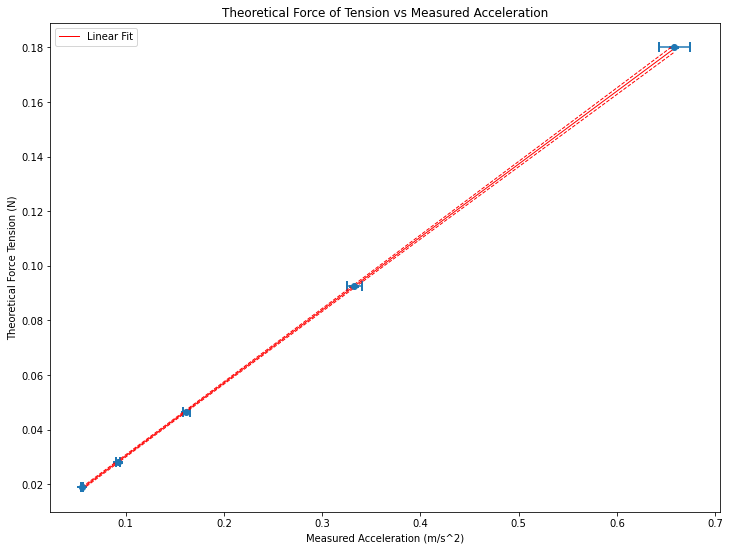

In [27]:
# Raw Data 
# Cart Mass 2

doPrintData = False # change this to False if you wish to hide the tables of calculated data

xaxis = np.array([])
yaxis = np.array([])
dxaxis = np.array([])
dyaxis = np.array([])

# Mass of the cart (kg) and its uncertainty
m2  = 0.30061
dm2 = 0.000005

#2#2# HANGING MASS #1 DATA #1#1#1#1#1#1#1#1#1#1#1#1#1

# Mass of hanging mass (kg) and its uncertainty
m1  = 0.00194
dm1 = 0.000005

theo_FT, dtheo_FT, a_p, da_p = massCalc(m2,dm2,m1,dm1)
yaxis = np.append(yaxis, theo_FT)
dyaxis = np.append(dyaxis, dtheo_FT)
df1 = pd.DataFrame()

# RUN 1 DATA HERE:[Trial1,Trial2,Trial3,Trial4,Trial5]
df1['v1 (m/s)'] = [0.09 ,0.07 ,0.07 ,0.08 ,0.08]
df1['t1 (s)']   = [2.824,4.228,7.096,2.298,2.323]
df1['v2 (m/s)'] = [0.23 ,0.23 ,0.22 ,0.23 ,0.23]
df1['t2 (s)']   = [5.441,6.970,9.875,4.977,4.978]

df1, av_am, dav_am = runCalc(df1)
xaxis = np.append(xaxis, av_am)
dxaxis = np.append(dxaxis, dav_am)

if doPrintData:
    printData(1,m2,dm2,m1,dm1,a_p,da_p,theo_FT,dtheo_FT,av_am,dav_am, df1)

#2#2# HANGING MASS #2 DATA #2#2#2#2#2#2#2#2#2#2#2#2#2
m1  = 0.00288
dm1 = 0.000005

theo_FT, dtheo_FT, a_p, da_p = massCalc(m2,dm2,m1,dm1)
yaxis = np.append(yaxis, theo_FT)
dyaxis = np.append(dyaxis, dtheo_FT)
df2 = pd.DataFrame()

# RUN 2 DATA HERE:[Trial1,Trial2,Trial3,Trial4,Trial5]
df2['v1 (m/s)'] = [0.11 ,0.10 ,0.10 ,0.09 ,0.10]
df2['t1 (s)']   = [2.250,2.381,2.364,2.561,2.019]
df2['v2 (m/s)'] = [0.30 ,0.29 ,0.29 ,0.29 ,0.29]
df2['t2 (s)']   = [4.283,4.493,4.463,4.681,4.103]

df2, av_am, dav_am = runCalc(df2)
xaxis = np.append(xaxis, av_am)
dxaxis = np.append(dxaxis, dav_am)

if doPrintData:
    printData(2,m2,dm2,m1,dm1,a_p,da_p,theo_FT,dtheo_FT,av_am,dav_am, df2)

#3#3# HANGING MASS #3 DATA #3#3#3#3#3#3#3#3#3#3#3#3#3
m1  = 0.00481
dm1 = 0.000005

theo_FT, dtheo_FT, a_p, da_p = massCalc(m2,dm2,m1,dm1)
yaxis = np.append(yaxis, theo_FT)
dyaxis = np.append(dyaxis, dtheo_FT)
df3 = pd.DataFrame()

# RUN 3 DATA HERE:[Trial1,Trial2,Trial3,Trial4,Trial5]
df3['v1 (m/s)'] = [0.17 ,0.15 ,0.13 ,0.13 ,0.14]
df3['t1 (s)']   = [2.443,1.741,1.869,2.452,2.376]
df3['v2 (m/s)'] = [0.40 ,0.40 ,0.39 ,0.39 ,0.39]
df3['t2 (s)']   = [3.928,3.271,3.444,4.027,3.928]

df3, av_am, dav_am = runCalc(df3)
xaxis = np.append(xaxis, av_am)
dxaxis = np.append(dxaxis, dav_am)

if doPrintData:
    printData(3,m2,dm2,m1,dm1,a_p,da_p,theo_FT,dtheo_FT,av_am,dav_am, df3)

#4#4# HANGING MASS #4 DATA #4#4#4#4#4#4#4#4#4#4#4#4#4
m1  = 0.00973
dm1 = 0.000005

theo_FT, dtheo_FT, a_p, da_p = massCalc(m2,dm2,m1,dm1)
yaxis = np.append(yaxis, theo_FT)
dyaxis = np.append(dyaxis, dtheo_FT)
df4 = pd.DataFrame()

# RUN 4 DATA HERE:[Trial1,Trial2,Trial3,Trial4,Trial5]
df4['v1 (m/s)'] = [0.18 ,0.22 ,0.23 ,0.20 ,0.20]
df4['t1 (s)']   = [1.244,1.919,0.934,1.188,1.545]
df4['v2 (m/s)'] = [0.56 ,0.57 ,0.57 ,0.56 ,0.56]
df4['t2 (s)']   = [2.345,2.981,1.974,2.276,2.632]

df4, av_am, dav_am = runCalc(df4)
xaxis = np.append(xaxis, av_am)
dxaxis = np.append(dxaxis, dav_am)

if doPrintData:
    printData(4,m2,dm2,m1,dm1,a_p,da_p,theo_FT,dtheo_FT,av_am,dav_am, df4)

#5#5# HANGING MASS #5 DATA #5#5#5#5#5#5#5#5#5#5#5#5#5
m1  = 0.01955
dm1 = 0.000005

theo_FT, dtheo_FT, a_p, da_p = massCalc(m2,dm2,m1,dm1)
yaxis = np.append(yaxis, theo_FT)
dyaxis = np.append(dyaxis, dtheo_FT)
df5 = pd.DataFrame()

# RUN 5 DATA HERE:[Trial1,Trial2,Trial3,Trial4,Trial5]
df5['v1 (m/s)'] = [0.31 ,0.27 ,0.29 ,0.28 ,0.30]
df5['t1 (s)']   = [0.963,1.210,1.097,1.107,1.075]
df5['v2 (m/s)'] = [0.80 ,0.78 ,0.79 ,0.79 ,0.79]
df5['t2 (s)']   = [1.713,1.983,1.853,1.871,1.828]

df5, av_am, dav_am = runCalc(df5)
xaxis = np.append(xaxis, av_am)
dxaxis = np.append(dxaxis, dav_am)

if doPrintData:
    printData(5,m2,dm2,m1,dm1,a_p,da_p,theo_FT,dtheo_FT,av_am,dav_am, df5)

#####################################################

plt.rcParams["figure.figsize"] = (12,9)
plt.errorbar(xaxis, yaxis, xerr=dxaxis, yerr=dyaxis, fmt='o', capsize=5, capthick=2)
plt.title("Theoretical Force of Tension vs Measured Acceleration")
plt.xlabel("Measured Acceleration (m/s^2)")
plt.ylabel("Theoretical Force Tension (N)")

b, m, db, dm = p201.linear_fit_plot_errors(xaxis,yaxis,dyaxis,plt)
plt.legend()
plt.show()

***

Linear Fit: Coefficients (from curve_fit)
[0.00312696 0.35449034]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 6.36314612e-07 -2.74438396e-06]
 [-2.74438396e-06  2.26476522e-05]]

Linear Fit: Final Result: y = (0.35449 +/- 0.00476) x + (0.00313 +/- 0.00080)



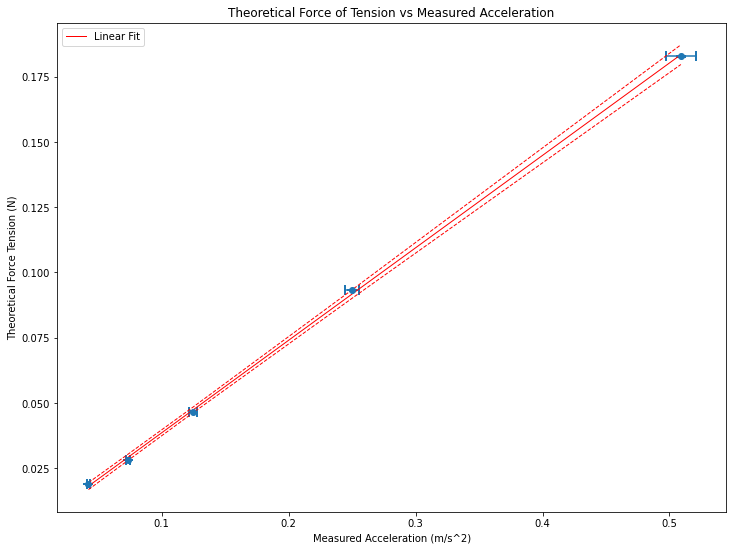

In [36]:
# Raw Data 
# Cart Mass 3

doPrintData = False # change this to False if you wish to hide the tables of calculated data

xaxis = np.array([])
yaxis = np.array([])
dxaxis = np.array([])
dyaxis = np.array([])

# Mass of the cart (kg) and its uncertainty
m2  = 0.40096
dm2 = 0.000005

#2#2# HANGING MASS #1 DATA #1#1#1#1#1#1#1#1#1#1#1#1#1

# Mass of hanging mass (kg) and its uncertainty
m1  = 0.00194
dm1 = 0.000005

theo_FT, dtheo_FT, a_p, da_p = massCalc(m2,dm2,m1,dm1)
yaxis = np.append(yaxis, theo_FT)
dyaxis = np.append(dyaxis, dtheo_FT)
df1 = pd.DataFrame()

# RUN 1 DATA HERE:[Trial1,Trial2,Trial3,Trial4,Trial5]
df1['v1 (m/s)'] = [0.09 ,0.06 ,0.06 ,0.08 ,0.08]
df1['t1 (s)']   = [3.312,3.220,2.670,2.298,8.034]
df1['v2 (m/s)'] = [0.20 ,0.19 ,0.19 ,0.23 ,0.19]
df1['t2 (s)']   = [6.218,6.394,5.869,4.977,11.111]

df1, av_am, dav_am = runCalc(df1)
xaxis = np.append(xaxis, av_am)
dxaxis = np.append(dxaxis, dav_am)

if doPrintData:
    printData(1,m2,dm2,m1,dm1,a_p,da_p,theo_FT,dtheo_FT,av_am,dav_am, df1)

#2#2# HANGING MASS #2 DATA #2#2#2#2#2#2#2#2#2#2#2#2#2
m1  = 0.00288
dm1 = 0.000005

theo_FT, dtheo_FT, a_p, da_p = massCalc(m2,dm2,m1,dm1)
yaxis = np.append(yaxis, theo_FT)
dyaxis = np.append(dyaxis, dtheo_FT)
df2 = pd.DataFrame()

# RUN 2 DATA HERE:[Trial1,Trial2,Trial3,Trial4,Trial5]
df2['v1 (m/s)'] = [0.08 ,0.08 ,0.09 ,0.09 ,0.09]
df2['t1 (s)']   = [2.696,2.755,2.080,2.561,2.692]
df2['v2 (m/s)'] = [0.25 ,0.25 ,0.25 ,0.29 ,0.25]
df2['t2 (s)']   = [5.163,5.210,4.515,4.681,5.075]

df2, av_am, dav_am = runCalc(df2)
xaxis = np.append(xaxis, av_am)
dxaxis = np.append(dxaxis, dav_am)

if doPrintData:
    printData(2,m2,dm2,m1,dm1,a_p,da_p,theo_FT,dtheo_FT,av_am,dav_am, df2)

#3#3# HANGING MASS #3 DATA #3#3#3#3#3#3#3#3#3#3#3#3#3
m1  = 0.00481
dm1 = 0.000005

theo_FT, dtheo_FT, a_p, da_p = massCalc(m2,dm2,m1,dm1)
yaxis = np.append(yaxis, theo_FT)
dyaxis = np.append(dyaxis, dtheo_FT)
df3 = pd.DataFrame()

# RUN 3 DATA HERE:[Trial1,Trial2,Trial3,Trial4,Trial5]
df3['v1 (m/s)'] = [0.14 ,0.10 ,0.11 ,0.10 ,0.10]
df3['t1 (s)']   = [2.056,1.828,2.828,3.003,1.554]
df3['v2 (m/s)'] = [0.34 ,0.33 ,0.33 ,0.33 ,0.33]
df3['t2 (s)']   = [3.771,3.473,4.654,4.876,3.416]

df3, av_am, dav_am = runCalc(df3)
xaxis = np.append(xaxis, av_am)
dxaxis = np.append(dxaxis, dav_am)

if doPrintData:
    printData(3,m2,dm2,m1,dm1,a_p,da_p,theo_FT,dtheo_FT,av_am,dav_am, df3)

#4#4# HANGING MASS #4 DATA #4#4#4#4#4#4#4#4#4#4#4#4#4
m1  = 0.00973
dm1 = 0.000005

theo_FT, dtheo_FT, a_p, da_p = massCalc(m2,dm2,m1,dm1)
yaxis = np.append(yaxis, theo_FT)
dyaxis = np.append(dyaxis, dtheo_FT)
df4 = pd.DataFrame()

# RUN 4 DATA HERE:[Trial1,Trial2,Trial3,Trial4,Trial5]
df4['v1 (m/s)'] = [0.16 ,0.18 ,0.18 ,0.16 ,0.18]
df4['t1 (s)']   = [1.907,1.141,1.711,1.111,1.304]
df4['v2 (m/s)'] = [0.48 ,0.48 ,0.49 ,0.48 ,0.49]
df4['t2 (s)']   = [3.177,2.374,2.946,2.377,2.545]

df4, av_am, dav_am = runCalc(df4)
xaxis = np.append(xaxis, av_am)
dxaxis = np.append(dxaxis, dav_am)

if doPrintData:
    printData(4,m2,dm2,m1,dm1,a_p,da_p,theo_FT,dtheo_FT,av_am,dav_am, df4)

#5#5# HANGING MASS #5 DATA #5#5#5#5#5#5#5#5#5#5#5#5#5
m1  = 0.01955
dm1 = 0.000005

theo_FT, dtheo_FT, a_p, da_p = massCalc(m2,dm2,m1,dm1)
yaxis = np.append(yaxis, theo_FT)
dyaxis = np.append(dyaxis, dtheo_FT)
df5 = pd.DataFrame()

# RUN 5 DATA HERE:[Trial1,Trial2,Trial3,Trial4,Trial5]
df5['v1 (m/s)'] = [0.25 ,0.23 ,0.22 ,0.23 ,0.22]
df5['t1 (s)']   = [3.942,0.941,0.875,2.111,1.017]
df5['v2 (m/s)'] = [0.69 ,0.68 ,0.68 ,0.68 ,0.68]
df5['t2 (s)']   = [4.817,1.830,1.767,2.996,1.916]

df5, av_am, dav_am = runCalc(df5)
xaxis = np.append(xaxis, av_am)
dxaxis = np.append(dxaxis, dav_am)

if doPrintData:
    printData(5,m2,dm2,m1,dm1,a_p,da_p,theo_FT,dtheo_FT,av_am,dav_am, df5)

#####################################################

plt.rcParams["figure.figsize"] = (12,9)
plt.errorbar(xaxis, yaxis, xerr=dxaxis, yerr=dyaxis, fmt='o', capsize=5, capthick=2)
plt.title("Theoretical Force of Tension vs Measured Acceleration")
plt.xlabel("Measured Acceleration (m/s^2)")
plt.ylabel("Theoretical Force Tension (N)")

b, m, db, dm = p201.linear_fit_plot_errors(xaxis,yaxis,dyaxis,plt)
plt.legend()
plt.show()

***

# Your Report
### Experimental Methods
You will need to write a few paragraphs to carefully describe how you set up and executed your
experiment. You must include the following items:
- Explain your procedure to ensure that the acceleration of the cart was caused only by the gravitational force due to the hanging mass.
- What did you use for your “flag” for the photogate?
- How did you take your data to reduce random errors?

Write your procedure section so that someone else could perform the experiment by just reading it (but do not write instructions). Talk about any problems you encountered and how you handled them.

### Results and Conclusion
This will be your longest section. Remember that your goal is to compare your theoretical prediction with your experimental results. Use good paragraph structure to link the results together:
- How do the slopes of your Tension vs. Acceleration graphs compare to the mass of the cart? Use the % error formula and discuss.
- Did you have any random errors? Any systematic errors? How do you know?
- Does your data support or refute Newton’s Second Law? *Why?*
- How might you reduce your uncertainties if you were to run the experiment again?


### Questions
1. Calculate the acceleration of a 0.5 kg cart with a 1.0 kg hanging mass.
2. Calculate the acceleration of a 1.0 kg cart with a 0.5 kg hanging mass.
3. Calculate the uncertainty of the acceleration for each of these. Which is lower?
4. Does the photogate measure the true instantaneous velocity of the cart? *Why or why not?*

### Appendix
*Include your signed raw data sheet(s)*  
*Include a sample calculation for every computation you need to make.*